<a href="https://colab.research.google.com/github/Ganesh00000/depression_prediction/blob/main/depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from google.colab import files

In [5]:
files.upload()

Saving b_depressed.csv to b_depressed.csv


{'b_depressed.csv': b'Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed\n926,91,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707,0\n747,57,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707,1\n1190,115,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707,0\n1065,97,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,1,0,1,22288055,18751329,0,7781123,69219765,0\n806,42,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0,0,53384566,20731006,1,20100562,43419447,0\n483,25,1,35,1,6,10,8,35937466,736707,23399979,30696127,11531066,0,1,0,1,22688441,

In [6]:
data=pd.read_csv("/content/b_depressed.csv")

In [7]:
data.shape

(1429, 23)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

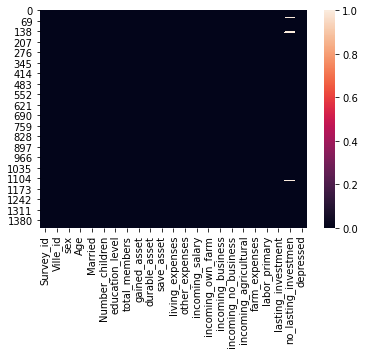

In [10]:
sb.heatmap(pd.isnull(data))

In [11]:
data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [13]:
data.dropna(how="any",inplace=True)

In [14]:
data_=data.copy()

In [15]:
data=data_[["Age","Married","Number_children","education_level","depressed"]]

In [16]:
data.head()

,Age,Married,Number_children,education_level,depressed
0,28,1,4,10,0
1,23,1,3,8,1
2,22,1,3,9,0
3,27,1,2,10,0
4,59,0,4,10,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


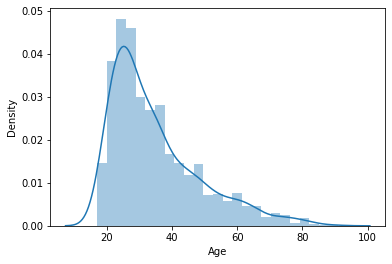

In [17]:
sb.distplot(data["Age"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


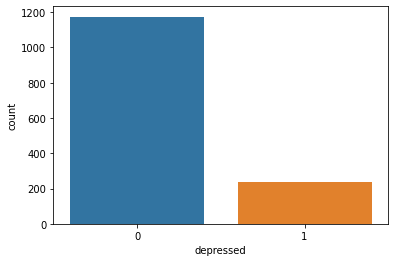

In [18]:
sb.countplot(data["depressed"])

In [19]:
data_depressed=data[data["depressed"]==1]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


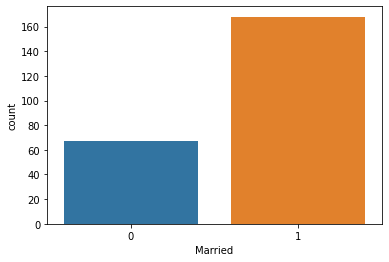

In [21]:
sb.countplot(data_depressed.Married)

Married people are likely to be more depressed as compare to non_married one


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


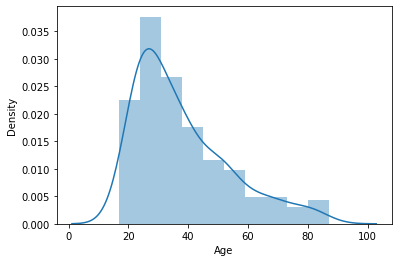

In [33]:
sb.distplot(data_depressed["Age"])

Age group between 25 to 30 are most likely to suffer from depression.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [37]:
x=data.drop("depressed",axis=1)
y=data["depressed"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [42]:
classifier=DecisionTreeClassifier()

In [43]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
y_predict=classifier.predict(x_test)

In [45]:
print(pd.DataFrame({"Actual":y_test,"Predict":y_predict}))

      Actual  Predict
1125       0        0
175        0        0
1048       0        0
465        1        0
139        0        0
...      ...      ...
976        0        0
442        1        0
731        0        0
919        0        0
380        0        1

[423 rows x 2 columns]


In [46]:
print(metrics.accuracy_score(y_test,y_predict))

0.7375886524822695


In [63]:
predict_test=[[24,1,3,10],[22,0,0,8],[27,1,2,9],[34,1,4,7],[22,1,1,7]]

In [64]:
classifier.predict(predict_test)

array([0, 0, 0, 1, 0])